In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imbalanced Data Preparation
models = ["Logistic Regression", "SVM", "SGD Classifier", "LightGBM"]
datasets = [
    "Real", "Syn (Copula Gaussian)", "Syn (GAN)", "Syn (CTGAN)", "Syn (TAVE)", 
    "Syn+Real (Copula Gaussian)", "Syn+Real (GAN)", "Syn+Real (CTGAN)", "Syn+Real (TAVE)"
]
f1_scores_imbalanced = np.array([
    [0.23, 0.80, 0.31, 0.05, 0.22, 0.83, 0.06, 0.12, 0.22],  # Logistic Regression
    [0.32, 0.80, 0.00, 0.05, 0.56, 0.86, 0.17, 0.11, 0.22],  # SVM
    [0.22, 0.68, 0.25, 0.20, 0.36, 0.80, 0.21, 0.26, 0.30],  # SGD Classifier
    [0.06, 0.06, 0.06, 0.06, 0.28, 0.17, 0.00, 0.12, 0.23],  # LightGBM
])

f1_scores_balanced = np.array([
    [0.35, 0.82, 0.42, 0.29, 0.41, 0.81, 0.28, 0.23, 0.28],  # Logistic Regression
    [0.32, 0.76, 0.17, 0.18, 0.41, 0.84, 0.22, 0.22, 0.22],  # SVM
    [0.17, 0.81, 0.61, 0.28, 0.44, 0.73, 0.17, 0.53, 0.22],  # SGD Classifier
    [0.27, 0.70, 0.23, 0.39, 0.48, 0.51, 0.18, 0.18, 0.23],  # LightGBM
])


In [30]:
def plot_f1_bar_chart(f1_scores, models, datasets, title="Model Performance Across Datasets", save_path=None):
    """
    """
    sns.set_theme(style="darkgrid")
    colors = sns.color_palette("Paired", len(datasets))

    plt.figure(figsize=(14, 6))
    width = 0.1  # Bar width
    x = np.arange(len(models))

    # Bar Graph
    for i, dataset in enumerate(datasets):
        plt.bar(x + i * width - 0.4, f1_scores[:, i], width, label=dataset, color=colors[i])

    
    for i, model in enumerate(models):
        trend_values = f1_scores[i, :]
        plt.plot(np.linspace(i - 0.4, i + 0.4, len(datasets)), trend_values, marker='o', linestyle='-', 
                 color='black', alpha=0.4)

    # Labeling
    plt.xticks(x, models, rotation=30, ha='right', fontsize=12)
    plt.ylabel("F1-Score", fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)
    plt.tight_layout()

    # Save Option
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()


def plot_f1_heatmap(f1_scores, models, datasets, title="F1-Score Heatmap", cmap="mako", save_path=None):
    """

    """
    sns.set_theme(style="darkgrid")

    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(f1_scores, annot=True, fmt=".2f", cmap=cmap, xticklabels=datasets, yticklabels=models, 
                     linewidths=0.3, linecolor='gray')

    # Font Style 
    plt.xticks(rotation=30, ha='right', fontsize=12, fontweight="bold")
    plt.yticks(fontsize=10, fontweight="bold")
    plt.xlabel("Dataset Type", fontsize=16, fontweight="bold")
    plt.ylabel("Model", fontsize=16, fontweight="bold")
    plt.title(title, fontsize=18, fontweight="bold")

    # Back ground Style
    ax.set_facecolor("white")
    plt.tight_layout()

    # Save option
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()

Dataset Imbalanced......



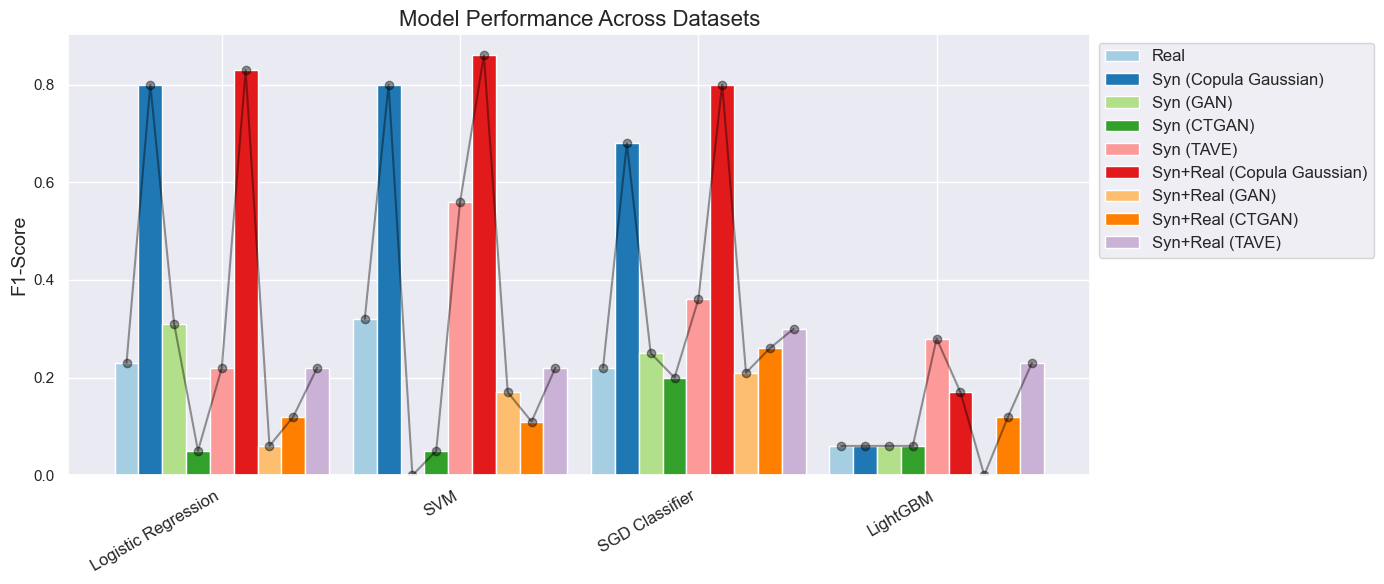

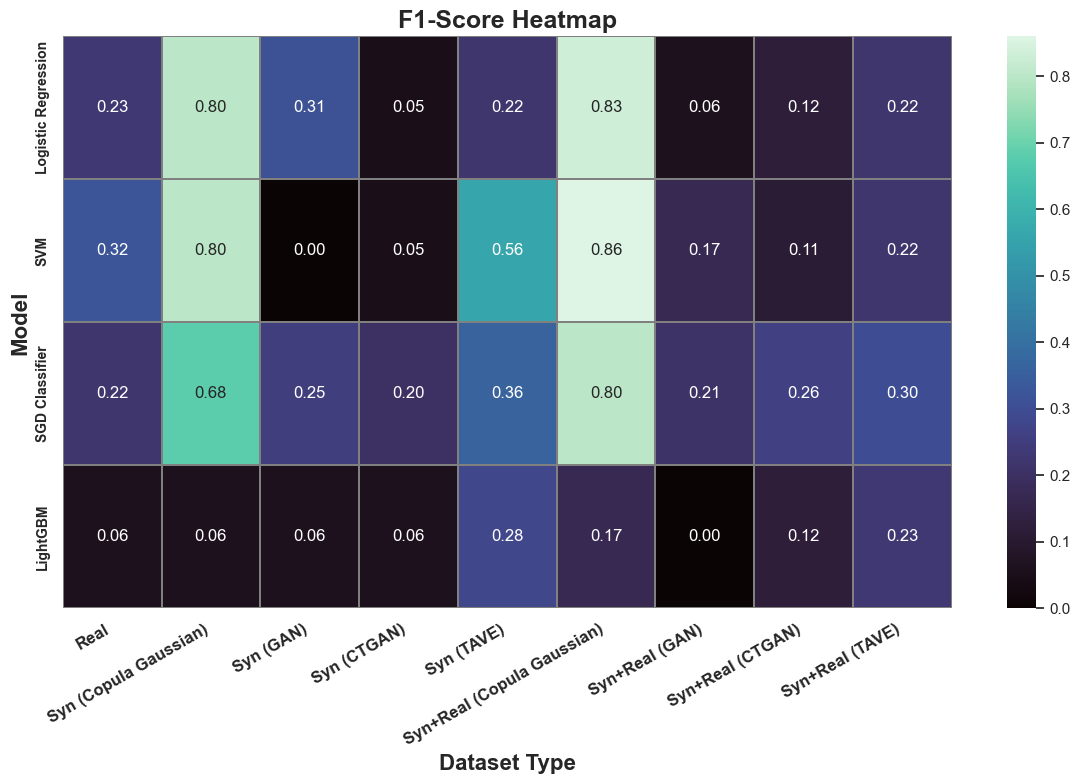

Dataset Resolved Imbalanced.....



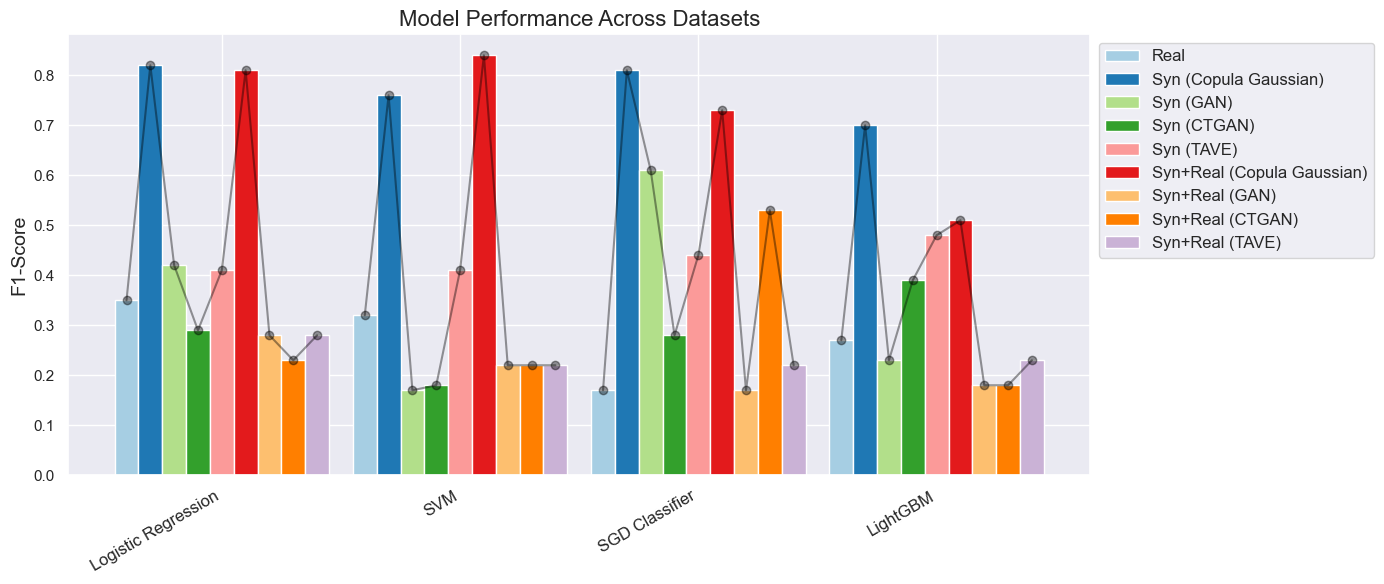

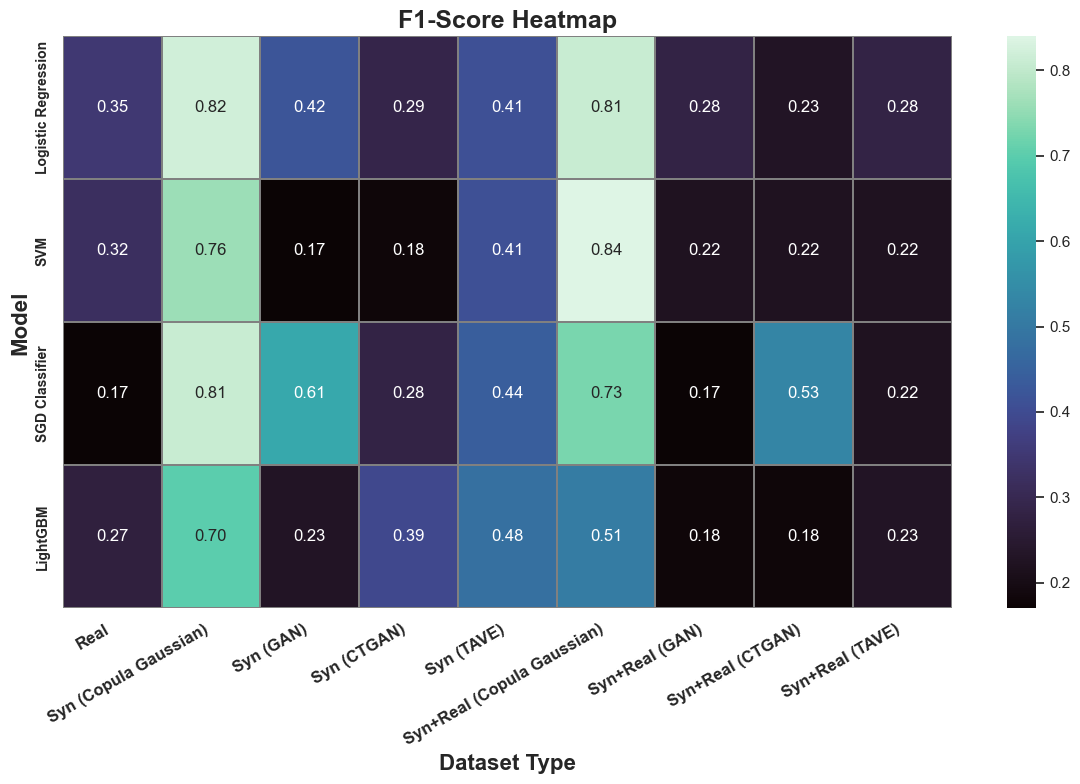

In [31]:
print('Dataset Imbalanced......\n')
plot_f1_bar_chart(f1_scores_imbalanced, models, datasets)
plot_f1_heatmap(f1_scores_imbalanced, models, datasets)

print('Dataset Resolved Imbalanced.....\n')
plot_f1_bar_chart(f1_scores_balanced, models, datasets)
plot_f1_heatmap(f1_scores_balanced, models, datasets)